In [72]:
%reload_ext autoreload
%autoreload 2

import torch

import numpy as np
import matplotlib.pyplot as plt

from datasets import *
from models import *
from losses import *

In [73]:
# using apple's GPU
device = torch.device('cpu')

In [74]:
data_generator = GaussianDataset(device=device)

data_generator.generate_data(5000, 1)
train_loader = torch.utils.data.DataLoader(data_generator, batch_size=500, shuffle=True)

print('mean:', round(torch.mean(data_generator.y).item(), 2), 'std:', round(torch.std(data_generator.y).item(), 2))

data_generator.generate_data(1000, 1)
test_loader = torch.utils.data.DataLoader(data_generator, batch_size=1000, shuffle=True)

mean: -0.03 std: 2.17


likelihood: tensor(1.8287)2.64
log_prior: tensor(3.7522)
log_p_q: tensor(1.6665)
elbo: tensor(3.4618)


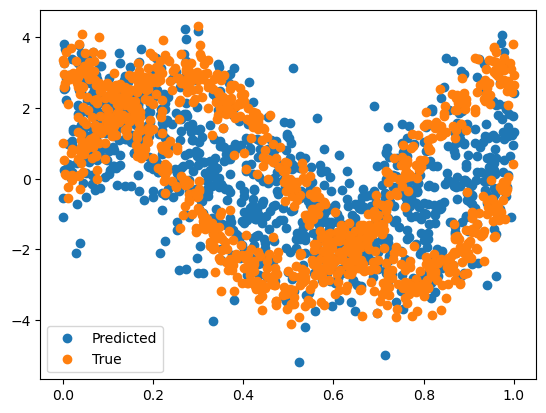

In [75]:
model = VI(1).to(device)
epochs = 2000
optim = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = GaussianMixtureLoss(torch.mean(data_generator.y).item(), torch.std(data_generator.y).item(), device=device)

for epoch in range(epochs):
    if epoch % 100 == 0:
        print('Epoch:', epoch, 'to', epoch+100, 'Loss:', round(loss.item(), 2), end='\r', flush=True)
    for X, y in train_loader:
        optim.zero_grad()
        y_pred, mu, log_var, weights = model(X)
        loss = loss_fn(y_pred, y, mu, log_var, weights)
        loss.backward()
        optim.step()

X_test_list, y_test_list, y_pred_list, mu_pred_list = [], [], [], []
with torch.no_grad():
    for X, y in test_loader:
        X_test_list += X.flatten().tolist()
        y_test_list += y.flatten().tolist()
        y_pred, mu, log_var, weights = model(X)
        y_pred_list += y_pred.flatten().tolist()
        mu_pred_list += mu.mean(dim=1).flatten().tolist()
        if nll_gm(y, mu, log_var, weights).mean() < 0:
            print(nll_gm(y, mu, log_var, weights).mean())
        elbo_gm_eval(y_pred, y, mu, log_var, weights)

plt.plot(X_test_list, y_pred_list, 'o', label='Predicted')
plt.plot(X_test_list, y_test_list, 'o', label='True')
# plt.plot(X_test_list, mu_pred_list, 'o', label='Mean')
# plt.plot(X_test_list, np.array(X_test_list)*5, label='True')
plt.legend()
plt.show()

likelihood: tensor(1.5988)2.32
log_prior: tensor(3.9108)
log_p_q: tensor(1.6250)
elbo: tensor(3.3429)


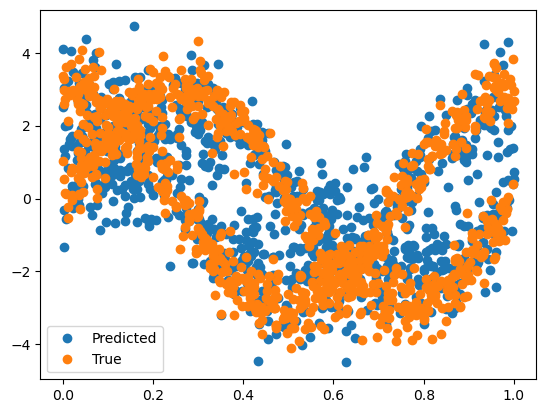

In [76]:
model = VI(2).to(device)
epochs = 2000
optim = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = GaussianMixtureLoss(torch.mean(data_generator.y).item(), torch.std(data_generator.y).item(), device=device)

for epoch in range(epochs):
    if epoch % 100 == 0:
        print('Epoch:', epoch, 'to', epoch+100, 'Loss:', round(loss.item(), 2), end='\r', flush=True)
    for X, y in train_loader:
        optim.zero_grad()
        y_pred, mu, log_var, weights = model(X)
        loss = loss_fn(y_pred, y, mu, log_var, weights)
        loss.backward()
        optim.step()

X_test_list, y_test_list, y_pred_list, mu_pred_list = [], [], [], []
with torch.no_grad():
    for X, y in test_loader:
        X_test_list += X.flatten().tolist()
        y_test_list += y.flatten().tolist()
        y_pred, mu, log_var, weights = model(X)
        y_pred_list += y_pred.flatten().tolist()
        mu_pred_list += mu.mean(dim=1).flatten().tolist()
        if nll_gm(y, mu, log_var, weights).mean() < 0:
            print(nll_gm(y, mu, log_var, weights).mean())
        elbo_gm_eval(y_pred, y, mu, log_var, weights)

plt.plot(X_test_list, y_pred_list, 'o', label='Predicted')
plt.plot(X_test_list, y_test_list, 'o', label='True')
# plt.plot(X_test_list, mu_pred_list, 'o', label='Mean')
# plt.plot(X_test_list, np.array(X_test_list)*5, label='True')
plt.legend()
plt.show()

likelihood: tensor(1.5996)2.39
log_prior: tensor(4.0944)
log_p_q: tensor(1.5911)
elbo: tensor(3.2028)


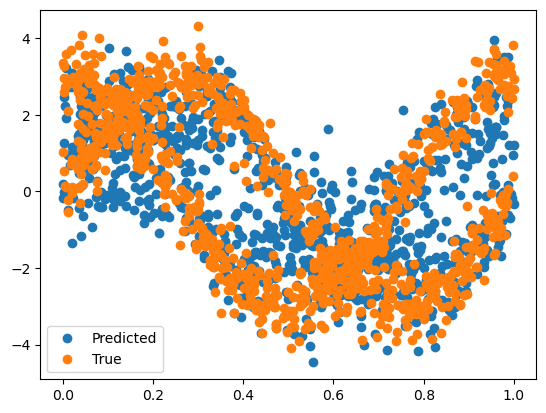

In [77]:
model = VI(3).to(device)
epochs = 2000
optim = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = GaussianMixtureLoss(torch.mean(data_generator.y).item(), torch.std(data_generator.y).item(), device=device)

for epoch in range(epochs):
    if epoch % 100 == 0:
        print('Epoch:', epoch, 'to', epoch+100, 'Loss:', round(loss.item(), 2), end='\r', flush=True)
    for X, y in train_loader:
        optim.zero_grad()
        y_pred, mu, log_var, weights = model(X)
        loss = loss_fn(y_pred, y, mu, log_var, weights)
        loss.backward()
        optim.step()

X_test_list, y_test_list, y_pred_list, mu_pred_list = [], [], [], []
with torch.no_grad():
    for X, y in test_loader:
        X_test_list += X.flatten().tolist()
        y_test_list += y.flatten().tolist()
        y_pred, mu, log_var, weights = model(X)
        y_pred_list += y_pred.flatten().tolist()
        mu_pred_list += mu.mean(dim=1).flatten().tolist()
        if nll_gm(y, mu, log_var, weights).mean() < 0:
            print(nll_gm(y, mu, log_var, weights).mean())
        elbo_gm_eval(y_pred, y, mu, log_var, weights)

plt.plot(X_test_list, y_pred_list, 'o', label='Predicted')
plt.plot(X_test_list, y_test_list, 'o', label='True')
# plt.plot(X_test_list, mu_pred_list, 'o', label='Mean')
# plt.plot(X_test_list, np.array(X_test_list)*5, label='True')
plt.legend()
plt.show()

likelihood: tensor(1.5608)2.35
log_prior: tensor(4.1040)
log_p_q: tensor(1.5659)
elbo: tensor(3.2447)


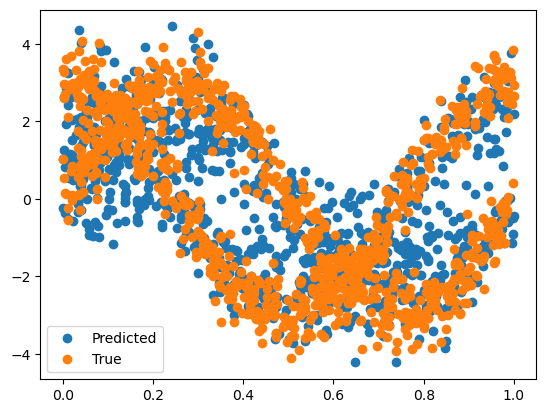

In [78]:
model = VI(4).to(device)
epochs = 2000
optim = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = GaussianMixtureLoss(torch.mean(data_generator.y).item(), torch.std(data_generator.y).item(), device=device)

for epoch in range(epochs):
    if epoch % 100 == 0:
        print('Epoch:', epoch, 'to', epoch+100, 'Loss:', round(loss.item(), 2), end='\r', flush=True)
    for X, y in train_loader:
        optim.zero_grad()
        y_pred, mu, log_var, weights = model(X)
        loss = loss_fn(y_pred, y, mu, log_var, weights)
        loss.backward()
        optim.step()

X_test_list, y_test_list, y_pred_list, mu_pred_list = [], [], [], []
with torch.no_grad():
    for X, y in test_loader:
        X_test_list += X.flatten().tolist()
        y_test_list += y.flatten().tolist()
        y_pred, mu, log_var, weights = model(X)
        y_pred_list += y_pred.flatten().tolist()
        mu_pred_list += mu.mean(dim=1).flatten().tolist()
        if nll_gm(y, mu, log_var, weights).mean() < 0:
            print(nll_gm(y, mu, log_var, weights).mean())
        elbo_gm_eval(y_pred, y, mu, log_var, weights)

plt.plot(X_test_list, y_pred_list, 'o', label='Predicted')
plt.plot(X_test_list, y_test_list, 'o', label='True')
# plt.plot(X_test_list, mu_pred_list, 'o', label='Mean')
# plt.plot(X_test_list, np.array(X_test_list)*5, label='True')
plt.legend()
plt.show()

likelihood: tensor(1.5925)2.44
log_prior: tensor(3.9292)
log_p_q: tensor(1.6488)
elbo: tensor(3.3074)


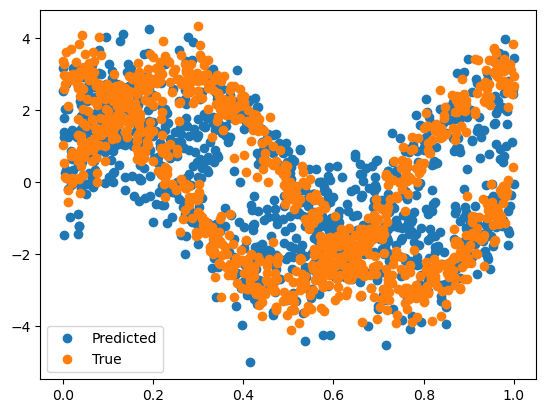

In [79]:
model = VI(5).to(device)
epochs = 2000
optim = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = GaussianMixtureLoss(torch.mean(data_generator.y).item(), torch.std(data_generator.y).item(), device=device)

for epoch in range(epochs):
    if epoch % 100 == 0:
        print('Epoch:', epoch, 'to', epoch+100, 'Loss:', round(loss.item(), 2), end='\r', flush=True)
    for X, y in train_loader:
        optim.zero_grad()
        y_pred, mu, log_var, weights = model(X)
        loss = loss_fn(y_pred, y, mu, log_var, weights)
        loss.backward()
        optim.step()

X_test_list, y_test_list, y_pred_list, mu_pred_list = [], [], [], []
with torch.no_grad():
    for X, y in test_loader:
        X_test_list += X.flatten().tolist()
        y_test_list += y.flatten().tolist()
        y_pred, mu, log_var, weights = model(X)
        y_pred_list += y_pred.flatten().tolist()
        mu_pred_list += mu.mean(dim=1).flatten().tolist()
        if nll_gm(y, mu, log_var, weights).mean() < 0:
            print(nll_gm(y, mu, log_var, weights).mean())
        elbo_gm_eval(y_pred, y, mu, log_var, weights)

plt.plot(X_test_list, y_pred_list, 'o', label='Predicted')
plt.plot(X_test_list, y_test_list, 'o', label='True')
# plt.plot(X_test_list, mu_pred_list, 'o', label='Mean')
# plt.plot(X_test_list, np.array(X_test_list)*5, label='True')
plt.legend()
plt.show()

In [55]:
# print the parameters of the model
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

q_mu.0.weight tensor([[ 1.1539],
        [ 0.1473],
        [-0.1989],
        [-1.0817],
        [-1.0940],
        [-1.2641],
        [-1.3275],
        [ 0.6819],
        [ 0.9922],
        [ 1.2259],
        [-0.7363],
        [-0.0015],
        [-0.8166],
        [-0.9598],
        [-0.0448],
        [ 0.2977],
        [-0.5693],
        [-1.0458],
        [-0.3771],
        [ 0.6792]])
q_mu.0.bias tensor([-0.6765, -0.2764, -0.5981,  0.9929,  0.8083,  0.1560,  0.3206,  0.9046,
        -0.3096, -0.3728,  0.6327,  0.4933,  1.0503, -0.4687, -0.8688, -0.4641,
         0.9185,  0.7728,  0.3235,  0.3407])
q_mu.2.weight tensor([[-9.8396e-01, -2.9070e-02, -1.0384e-01,  3.3759e-01, -8.7894e-01,
          9.1792e-03,  9.3592e-02,  1.6017e-01,  3.4381e-01,  1.8676e-01,
         -1.1088e+00, -5.3262e-02, -1.2834e-01, -1.0071e-02, -1.1798e-01,
         -1.3583e-01,  8.0165e-02, -1.2144e+00, -1.2092e+00,  3.1530e-01],
        [-2.2656e-01, -5.3709e-02, -2.2168e-01, -5.8287e-02, -1.1405e-01,
   

tensor(-1.1803)
likelihood: tensor(-1.1803)
log_prior: tensor(2.8773)
log_p_q: tensor(0.4574)
elbo: tensor(-0.5260)


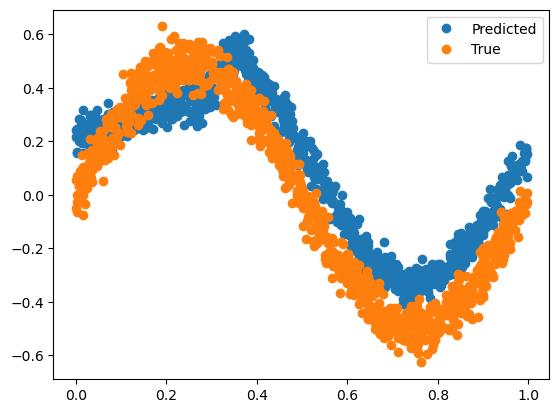

In [51]:
X_test_list, y_test_list, y_pred_list, mu_pred_list = [], [], [], []
with torch.no_grad():
    for X, y in test_loader:
        X_test_list += X.flatten().tolist()
        y_test_list += y.flatten().tolist()
        y_pred, mu, log_var, weights = model(X)
        y_pred_list += y_pred.flatten().tolist()
        mu_pred_list += mu.mean(dim=1).flatten().tolist()
        if nll_gm(y, mu, log_var, weights).mean() < 0:
            print(nll_gm(y, mu, log_var, weights).mean())
        elbo_gm_eval(y_pred, y, mu, log_var, weights)

plt.plot(X_test_list, y_pred_list, 'o', label='Predicted')
plt.plot(X_test_list, y_test_list, 'o', label='True')
# plt.plot(X_test_list, mu_pred_list, 'o', label='Mean')
# plt.plot(X_test_list, np.array(X_test_list)*5, label='True')
plt.legend()
plt.show()

NameError: name 'gaussian' is not defined

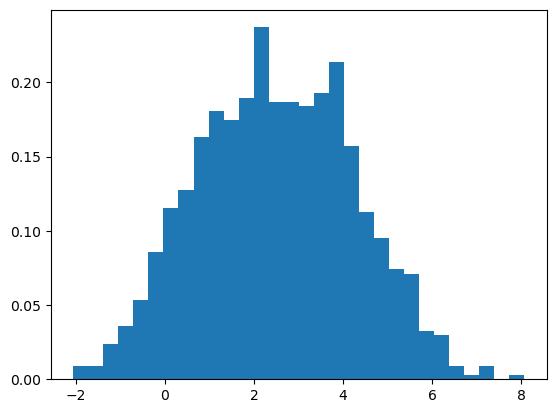

In [20]:
plt.hist(y_test, bins=30, density=True)
plt.plot(np.linspace(-3, 7, 100), gaussian(np.linspace(-3, 7, 100), np.mean(y_test), np.std(y_test)))

In [ ]:
# y_pred, y, mu, log_var

det_loss()

In [66]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) / (sig * np.sqrt(2 * np.pi))

model.eval()
y_pred = []

for i in range(100000):
    y_pred.append(model(X[1])[0].item())

plt.hist(y_pred, bins=100, density=True)
plt.plot(np.linspace(-3, 3, 100), gaussian(np.linspace(-3, 3, 100), X[1].item(), 1))
plt.show()

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)